In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


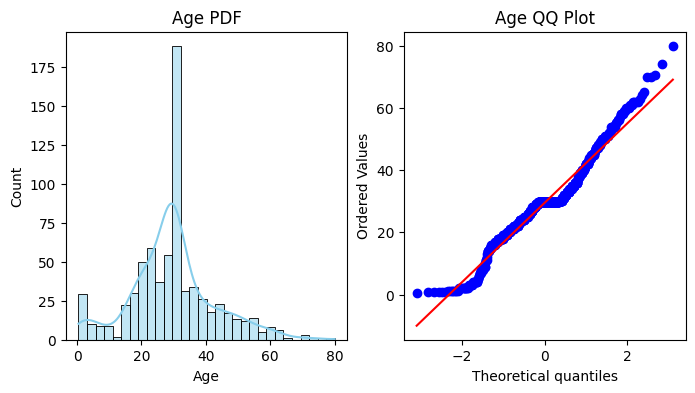

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True, bins=30, color="skyblue")
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title("Age QQ Plot")

plt.show()

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


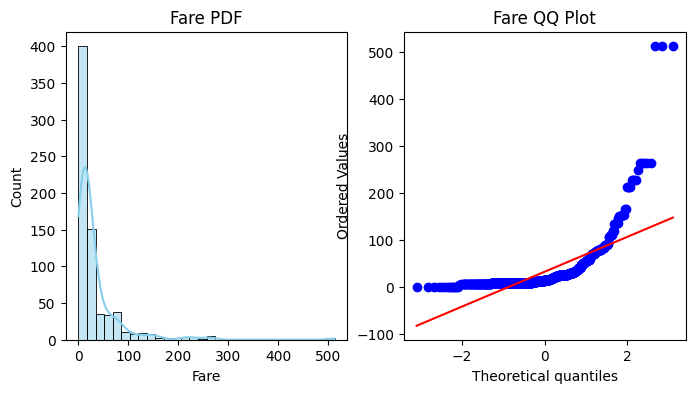

In [34]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True, bins=30, color="skyblue")
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("Fare QQ Plot")

plt.show()

In [36]:
CLF = LogisticRegression()
CLF2 = DecisionTreeClassifier()

CLF.fit(x_train,y_train)
CLF2.fit(x_train,y_train)

y_pred = CLF.predict(x_test)
y_pred2 = CLF2.predict(x_test)

print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Decision Tree Accuracy: ",accuracy_score(y_test,y_pred2)*100)


Logistic Regression Accuracy:  64.80446927374301
Decision Tree Accuracy:  67.0391061452514


In [37]:
trf = FunctionTransformer(np.log1p)

In [38]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [51]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred = clf.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Decision Tree Accuracy: ",accuracy_score(y_test,y_pred2)*100)

Logistic Regression Accuracy:  68.15642458100558
Decision Tree Accuracy:  67.0391061452514


In [54]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed,y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed,y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6588389513108613


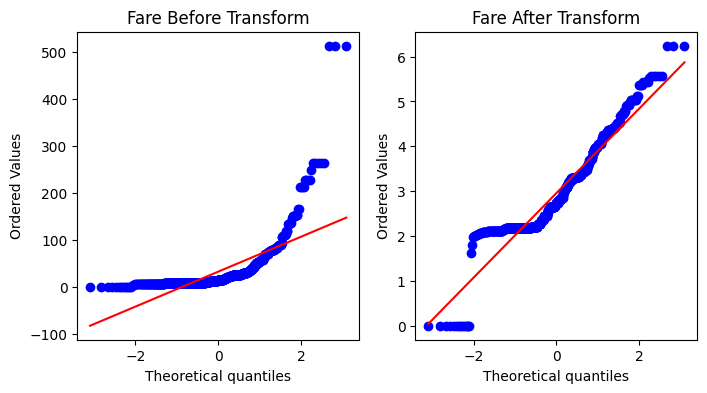

In [55]:
plt.figure(figsize=(8,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("Fare Before Transform")

plt.subplot(122)
stats.probplot(x_train_trf['Fare'],dist="norm",plot=plt)
plt.title("Fare After Transform")

plt.show()

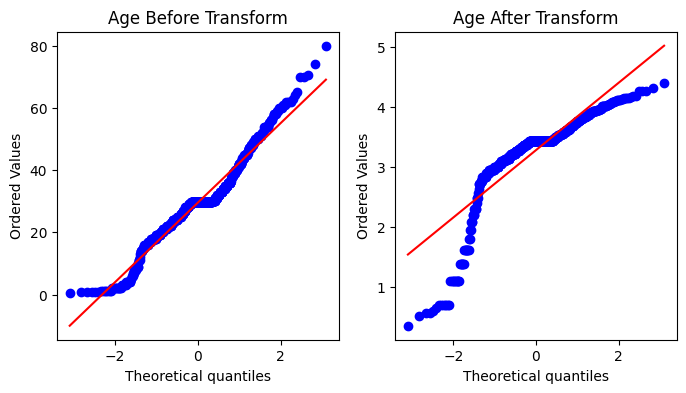

In [56]:
plt.figure(figsize=(8,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title("Age Before Transform")

plt.subplot(122)
stats.probplot(x_train_trf['Age'],dist="norm",plot=plt)
plt.title("Age After Transform")

plt.show()